In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_percentage_error
import codesModel as codeM


In [2]:
# Opciones de pandas
rows, cols = 50, 50
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas

In [12]:
data = pd.read_csv('testconcat.csv', header=[0,1], index_col=0)
data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m-%d'), inplace=True)
data

Attributes       Close                                                 \
Symbol             BDX         GL         IBM         NSC         PEP   
1985-03-01    1.721667   3.255194   14.186936    2.770183    1.143114   
1985-03-04    1.687380   3.033250   14.095586    2.754384    1.141212   
1985-03-05    1.655797   3.107232   14.095586    2.738583    1.164987   
1985-03-06    1.642262   3.088737   13.873695    2.759651    1.147157   
1985-03-07    1.637751   3.033250   13.586567    2.822849    1.144183   
...                ...        ...         ...         ...         ...   
2020-12-23  244.250000  92.720818  122.266174  232.182770  144.410004   
2020-12-24  247.990005  92.690872  123.045761  233.447678  145.059998   
2020-12-28  248.149994  93.110062  123.174042  235.758347  146.910004   
2020-12-29  248.350006  91.982246  122.167496  233.049286  147.419998   
2020-12-30  246.679993  93.030212  122.700371  235.031281  147.309998   

Attributes   CloseNext                                                 \
Symbol             BDX         GL         IBM         NSC         PEP   
1985-03-01    1.687380   3.033250   14.095586    2.754384    1.141212   
1985-03-04    1.655797   3.107232   14.095586    2.738583    1.164987   
1985-03-05    1.642262   3.088737   13.873695    2.759651    1.147157   
1985-03-06    1.637751   3.033250   13.586567    2.822849    1.144183   
1985-03-07    1.619704   3.005508   13.534367    2.775449    1.141212   
...                ...        ...         ...         ...         ...   
2020-12-23  247.990005  92.690872  123.045761  233.447678  145.059998   
2020-12-24  248.149994  93.110062  123.174042  235.758347  146.910004   
2020-12-28  248.350006  91.982246  122.167496  233.049286  147.419998   
2020-12-29  246.679993  93.030212  122.700371  235.031281  147.309998   
2020-12-30         NaN        NaN         NaN         NaN         NaN   

Attributes        High                                                 \
Symbol             BDX         GL         IBM         NSC         PEP   
1985-03-01    1.721667   3.292185   14.278297    2.785982    1.154899   
1985-03-04    1.718962   3.273691   14.239152    2.785983    1.153099   
1985-03-05    1.687378   3.125728   14.186946    2.754383    1.170931   
1985-03-06    1.673845   3.107232   14.147776    2.775450    1.167960   
1985-03-07    1.642263   3.088737   13.925905    2.822849    1.153099   
...                ...        ...         ...         ...         ...   
2020-12-23  247.229996  93.449405  123.558897  233.258430  145.600006   
2020-12-24  249.250000  93.379536  123.450351  233.995469  145.110001   
2020-12-28  249.869995  94.477422  124.930568  237.511265  147.600006   
2020-12-29  250.750000  93.589134  123.825342  237.411666  148.770004   
2020-12-30  249.339996  93.658994  123.203648  235.987428  147.990005   

Attributes         Low                                                 \
Symbol             BDX         GL         IBM         NSC         PEP   
1985-03-01    1.676832   3.236698   13.991164    2.743850    1.125437   
1985-03-04    1.678356   2.996260   14.030328    2.743851    1.135268   
1985-03-05    1.651285   3.051746   14.056431    2.717518    1.141212   
1985-03-06    1.642262   3.051746   13.860644    2.717519    1.144184   
1985-03-07    1.624216   3.033250   13.573515    2.759651    1.132296   
...                ...        ...         ...         ...         ...   
2020-12-23  244.179993  91.932340  122.108281  229.573308  144.070007   
2020-12-24  244.899994  91.702776  122.572087  230.698779  144.139999   
2020-12-28  247.289993  92.750755  122.818788  234.244453  145.539993   
2020-12-29  247.279999  91.902399  121.614875  231.515469  146.839996   
2020-12-30  246.589996  92.471295  121.999734  233.059245  147.009995   

Attributes        Open                                                 ...  \
Symbol             BDX         GL         IBM         NSC         PEP  ...   
1985-03-01    1.676832   0.000000   14.04337

In [13]:
#Cuál es el número de registros?
#Cuál es el número de atributos?
shape = data.shape
shape

(9033, 80)

In [5]:
stocks_list = data.xs('Close', level=0, axis=1).columns
for i in stocks_list:
    print("stock",i)
    # Cual es el máximo de datos faltantes en un mismo registro?
    print(max(data.xs(i, level=1, axis=1).isnull().sum(axis=1)))
    #Cuantos datos faltantes hay por cada atributo?
    print(data.xs(i, level=1, axis=1).isnull().sum())

stock BDX
5
Attributes
Close         0
CloseNext     1
High          0
Low           0
Open          0
Volume        0
bop           0
ema20         0
ema200        0
lower        19
ma20         19
macd          0
momentum      1
signal        0
std20d       19
upper        19
dtype: int64
stock GL
5
Attributes
Close         0
CloseNext     1
High          0
Low           0
Open          0
Volume        0
bop           3
ema20         0
ema200        0
lower        19
ma20         19
macd          0
momentum      1
signal        0
std20d       19
upper        19
dtype: int64
stock IBM
5
Attributes
Close         0
CloseNext     1
High          0
Low           0
Open          0
Volume        0
bop           0
ema20         0
ema200        0
lower        19
ma20         19
macd          0
momentum      1
signal        0
std20d       19
upper        19
dtype: int64
stock NSC
5
Attributes
Close         0
CloseNext     1
High          0
Low           0
Open          0
Volume        0
bop   

## limpieza

En el primer box realizo una limpieza teniendo todas las acciones para que sea mas facil, ya que estas fechas en todas las acciones estan vacias por lo tanto se eliminan.

En el segundo box se borran estas acciones las cuales tienen muchos datos vacios

En el tercer box se hace uso de ffill 'forward fill' and will propagate last valid observation forward. inplace : If True, fill in place.

In [6]:
#se borran estas fechas las cuales estan vacias en todas las acciones
date_drops = ['2020-12-31','2020-12-30']
data.drop(date_drops, axis=0, errors='ignore', inplace=True)
data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m-%d'), inplace=True)

In [7]:
#borrar desde 1980
data.drop(data.index[:data.index.get_loc('1985-03-05')], axis=0, inplace=True)

In [8]:
# missing values in the data are interpolated using forward-fill (‘ffill ()’)method to propagate last valid observation forward.
data = data.fillna(method='bfill')

In [9]:
#se borran estos datos debido a la alta correlacion
attributes_to_erase = ('High','Low','Open','ma20','lower','upper','ema20')
for i in attributes_to_erase:
    data=data.drop(i, axis=1, level=0)

In [10]:
#Cuál es el número de registros?
#Cuál es el número de atributos?
shape = data.shape
shape

(9030, 45)

In [ ]:
data.to_csv('data_technical_clean.csv')

## algunos analisis individuales

<AxesSubplot:xlabel='Attributes', ylabel='Attributes'>

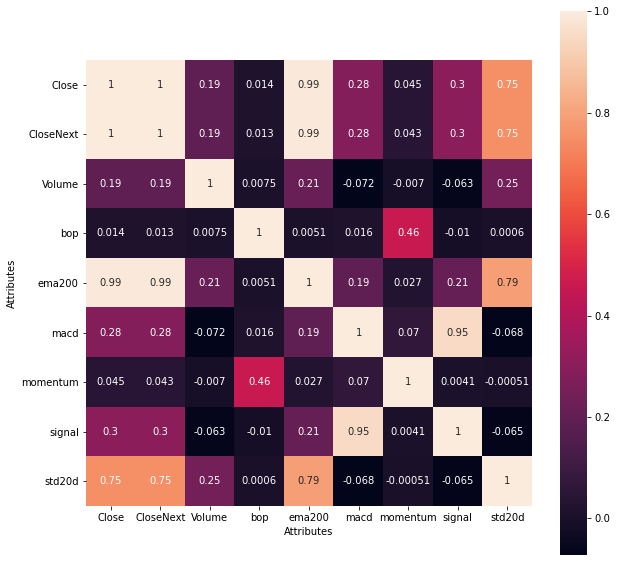

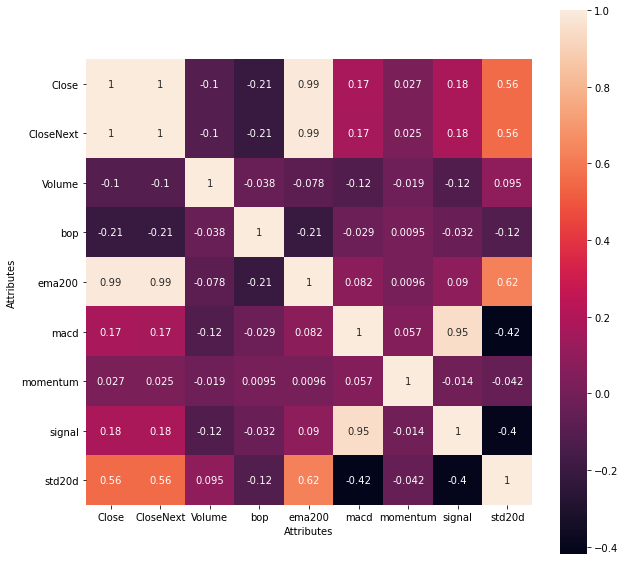

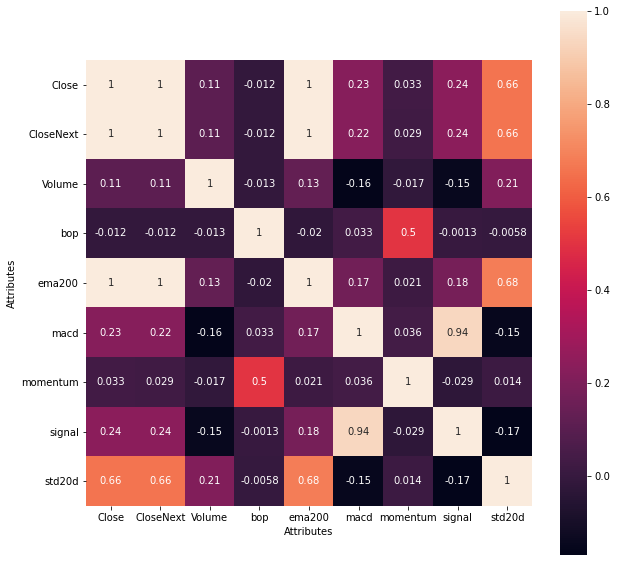

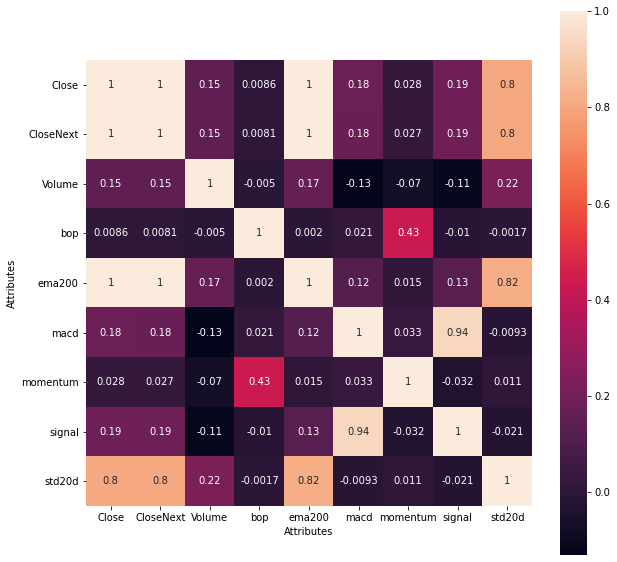

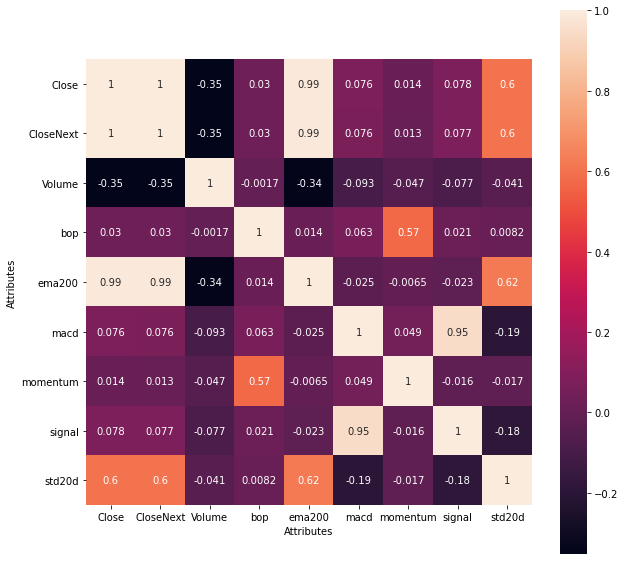

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.xs('NSC', level=1, axis=1).corr(), square=True, annot=True, ax=ax)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.xs('GL', level=1, axis=1).corr(), square=True, annot=True, ax=ax)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.xs('PEP', level=1, axis=1).corr(), square=True, annot=True, ax=ax)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.xs('BDX', level=1, axis=1).corr(), square=True, annot=True, ax=ax)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.xs('IBM', level=1, axis=1).corr(), square=True, annot=True, ax=ax)

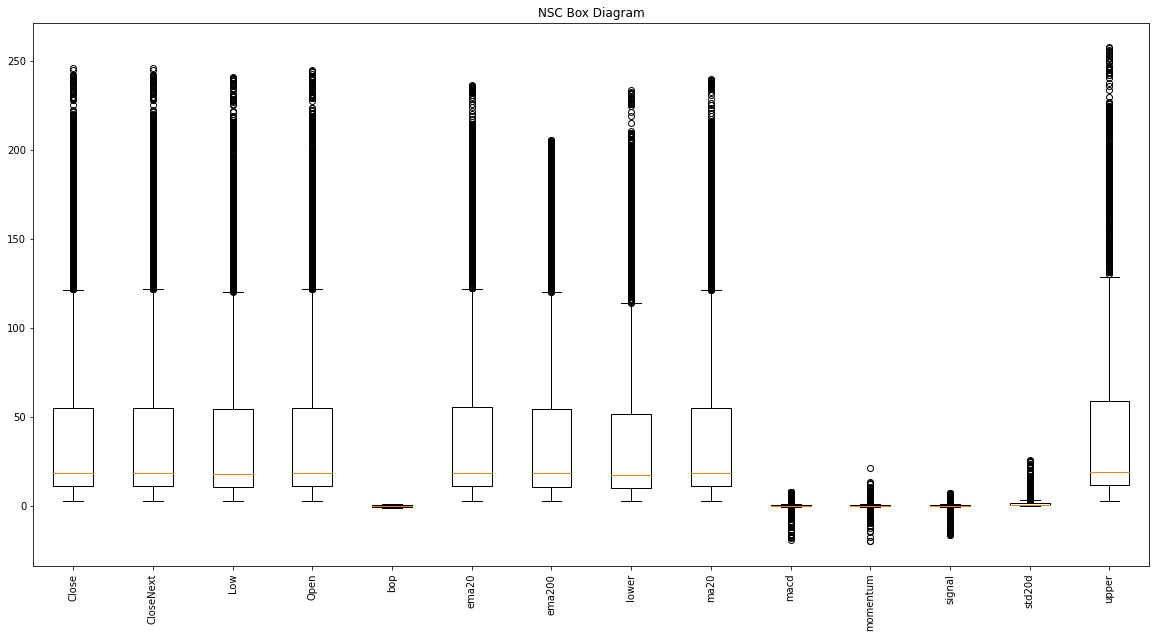

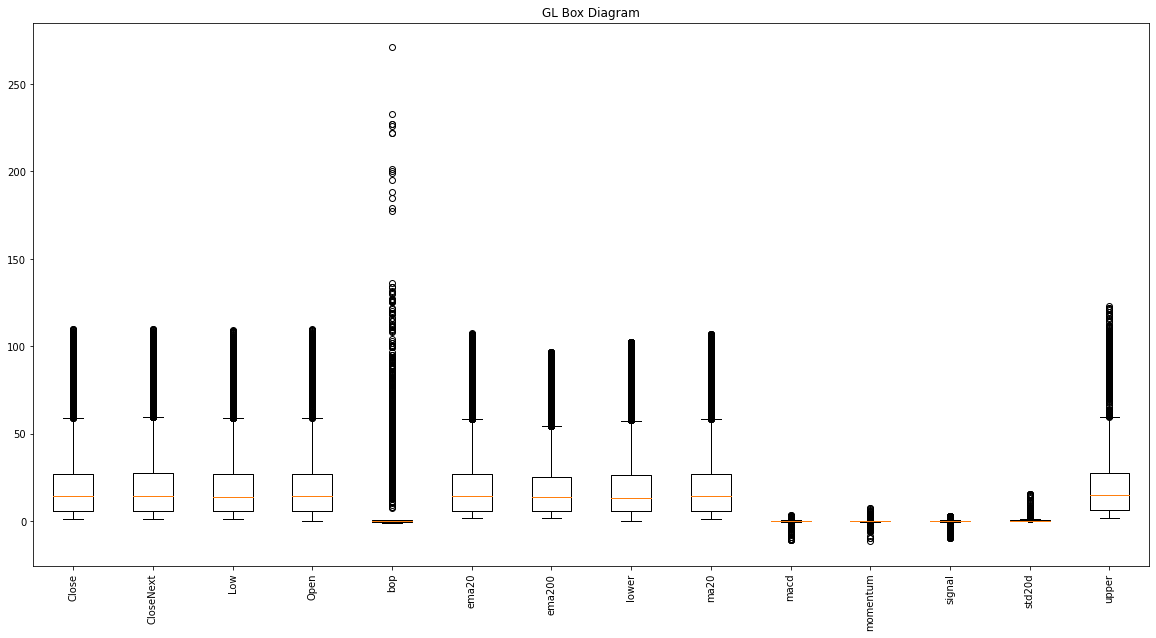

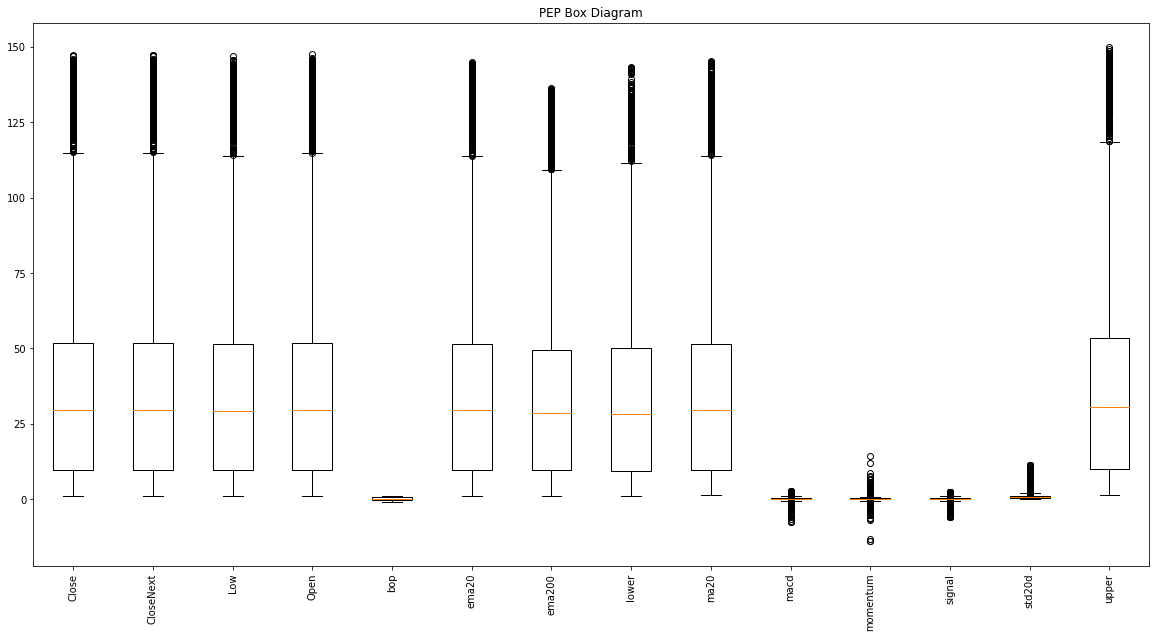

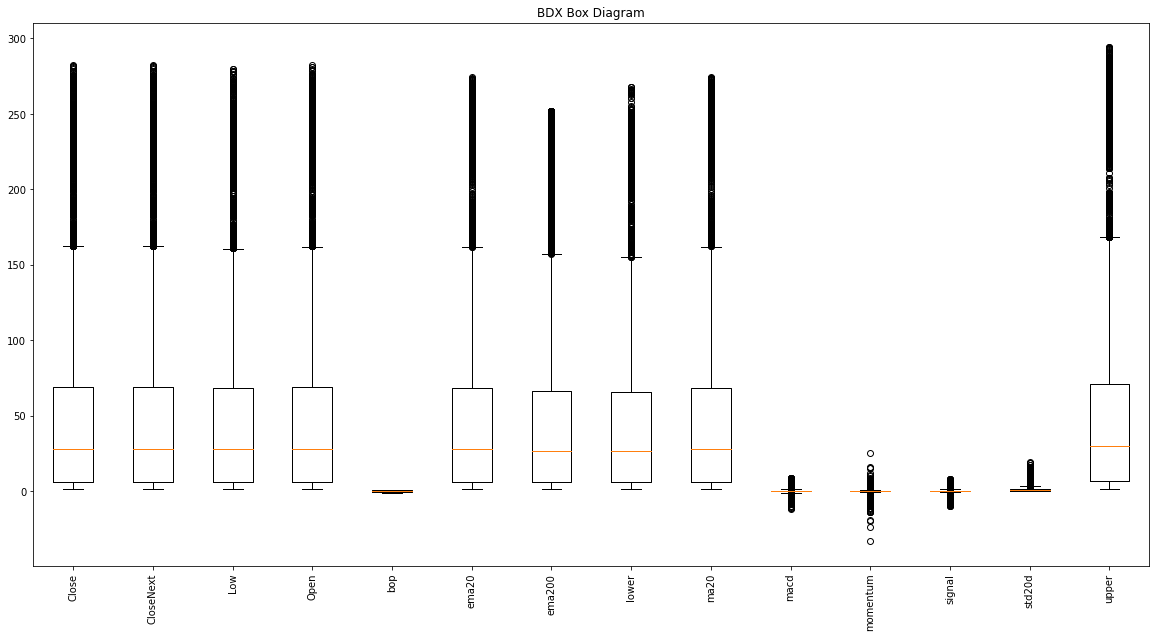

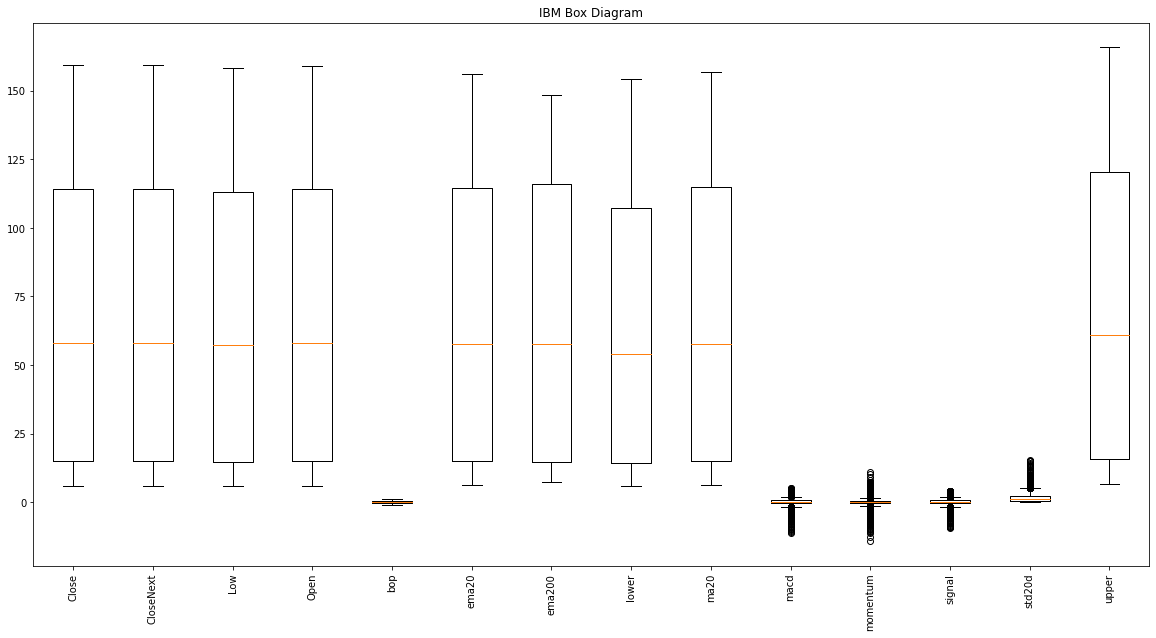

In [36]:
stock_sel = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
# Box Diagrams for numeric attributes
for stock in stock_sel:
    fig1,ax1 = plt.subplots(figsize=(20,10))
    ax1.set_title(stock+' Box Diagram')
    ax1.boxplot(data.xs(stock, level=1, axis=1), labels=data.xs(stock, level=1, axis=1).columns)
    plt.xticks(rotation=90)
    plt.show()

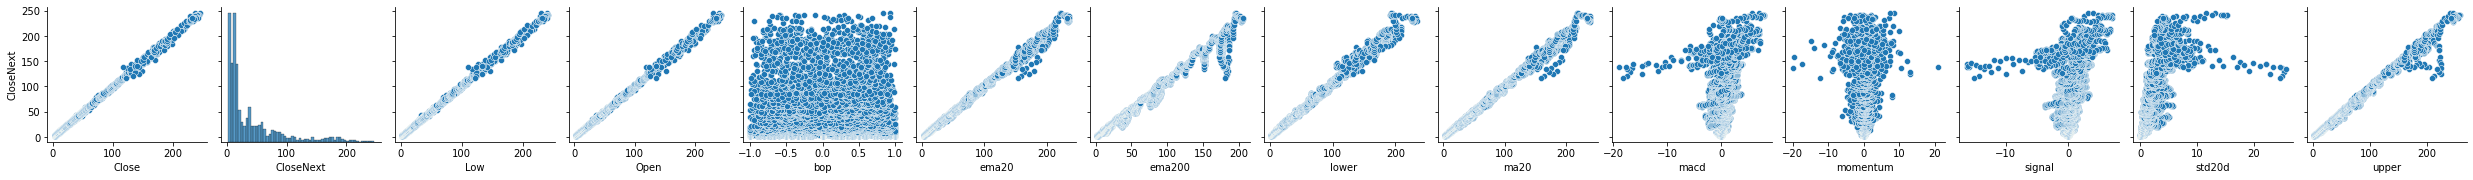

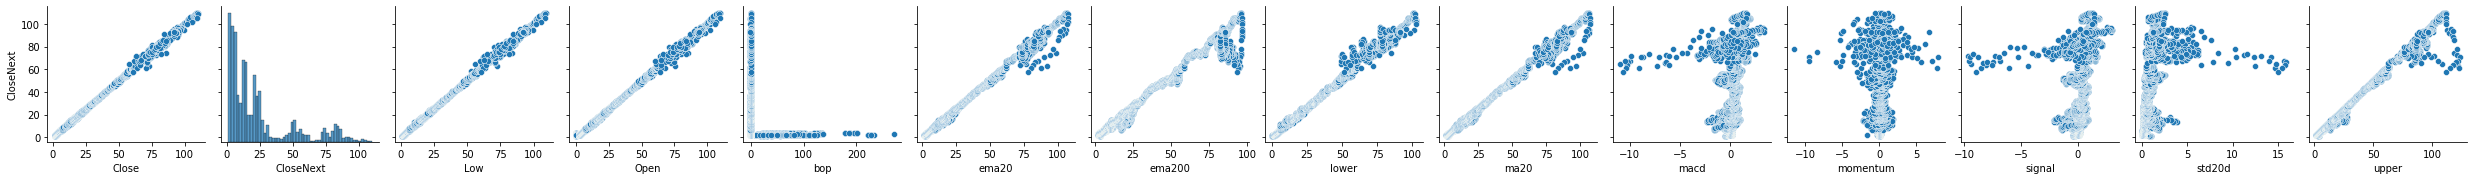

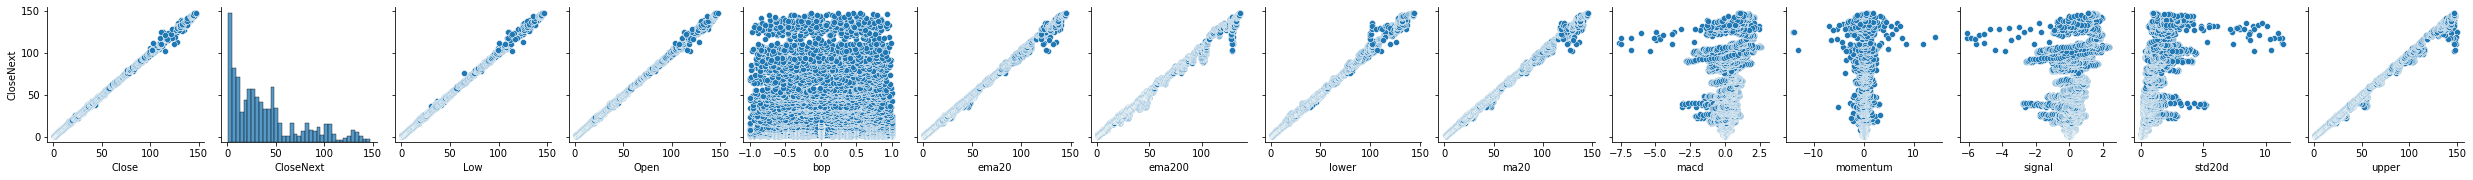

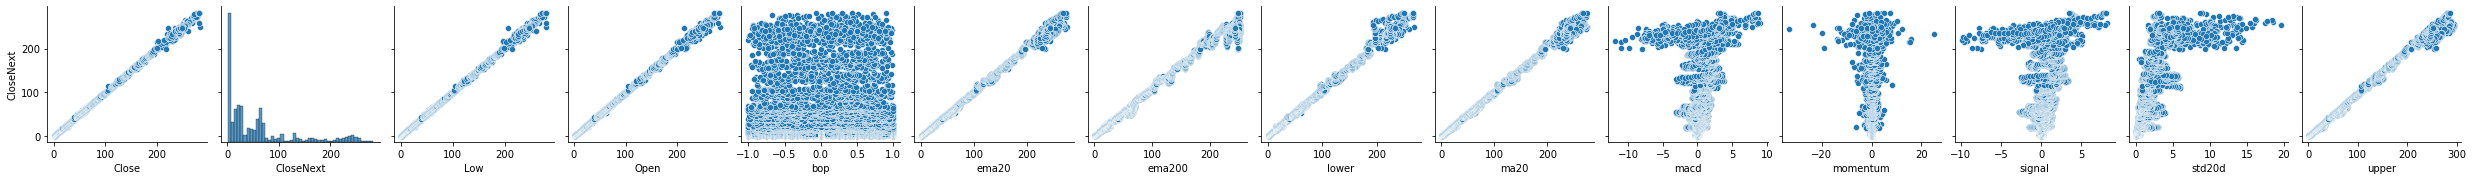

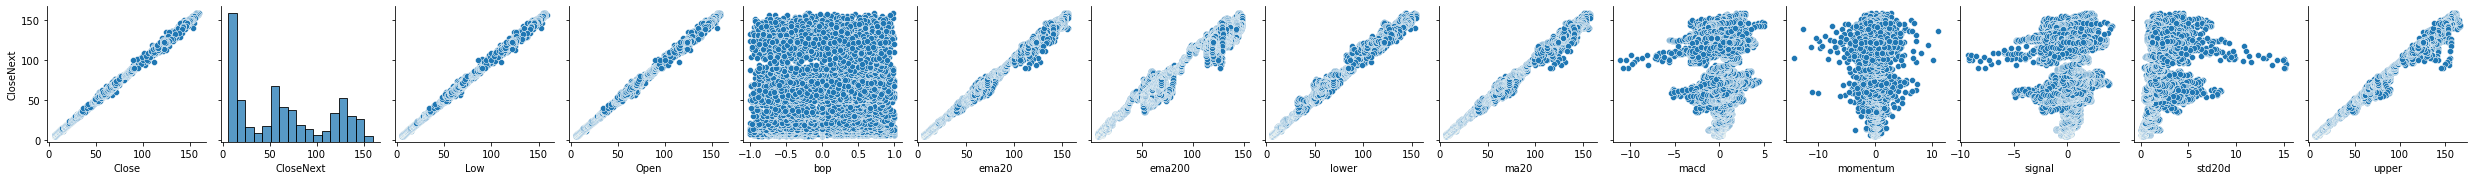

In [39]:
# Data visualization of features against dependent variable
for stock in stock_sel:
    sns.pairplot(data.xs(stock, level=1, axis=1), y_vars=['CloseNext'], kind="scatter")
    plt.show()

In [40]:
import missingno as msno
msno.matrix(data)

ModuleNotFoundError: No module named 'missingno'

## Modelo base

In [ ]:
dataNSC = data.xs('NSC', level=1, axis=1)
dataNSC

In [ ]:
r2Score = r2_score(dataNSC['CloseNext'],dataNSC['Close'])
rmse = mean_squared_error(dataNSC['CloseNext'],dataNSC['Close'], squared=False)
mae=median_absolute_error(dataNSC['CloseNext'],dataNSC['Close'])
print("r2Score:",r2Score)
print("rmse:",rmse)
print("mae:",mae)